<a href="https://colab.research.google.com/github/BellaEKE/SurvivalAnalysisMedicalResearch/blob/main/survivalcurve2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9b64dd0c39062b57d64d1db7bb4f009b0a830a0a39e25606e56f129cef14f7b7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


SURVIVAL ANALYSIS: EVENT OF INTEREST: "Time to Treatment Initiation," specifically, the time from the first contact or request for a substance use treatment service until the client was admitted and the first clinical substance use treatment service was provided.


EVENT for both groups=1 as they both started the treatment. So our investigation of survival focuses on the duration of the wait time(how long they had to wait and how does it affect survival)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df=pd.read_csv(r'/content/treatments_2017-2020.csv', nrows=10000)
df

,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,...,METHFLG,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty
0,6,-9,1,-9,-9,0,0,2,1,-9,...,0,-9,20171463590,0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",Metropolitan Statistical Area,San Luis Obispo County,California,79,Central
1,4,6,4,-9,-9,0,1,1,1,-9,...,0,-9,20171390962,0,"Chico, CA",Metropolitan Statistical Area,Butte County,California,7,Central
2,3,5,3,1,2,0,1,1,1,-9,...,0,-9,20171519498,0,"Anchorage, AK",Metropolitan Statistical Area,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying"
3,2,3,4,-9,-9,0,1,2,1,-9,...,0,-9,20171346634,0,"San Francisco-Oakland-Hayward, CA",Metropolitan Statistical Area,"Contra Costa County, San Francisco County, San...",California,"1, 13, 75, 81, 41","Central, Outlying"
4,3,7,4,4,4,0,1,2,1,4,...,0,3,20171324167,1,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,"New York County, Orange County, Hunterdon Coun...","New Jersey, New York, Pennsylvania","79, 87, 13, 81, 119, 25, 29, 59, 3, 85, 5, 61,...","Central, Outlying"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,-9,4,-9,-9,0,0,1,-9,-9,...,0,-9,20171592338,0,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,"Orange County, Los Angeles County",California,"59, 37",Central
9996,4,-9,4,-9,-9,0,0,1,2,-9,...,0,-9,20171399007,0,"Sacramento--Roseville--Arden-Arcade, CA",Metropolitan Statistical Area,"Placer County, El Dorado County, Sacramento Co...",California,"61, 113, 67, 17","Central, Outlying"
9997,4,4,4,-9,-9,0,0,1,2,-9,...,0,-9,20171595452,0,"Detroit-Warren-Dearborn, MI",Metropolitan Statistical Area,"St. Clair County, Lapeer County, Wayne County,...",Michigan,"87, 93, 147, 99, 163, 125","Outlying, Central"
9998,1,-9,4,-9,-9,0,0,1,2,-9,...,0,-9,20171416717,0,"San Diego-Carlsbad, CA",Metropolitan Statistical Area,San Diego County,California,73,Central


In [ ]:
df['DAYWAIT']

0       0
1       0
2       0
3       0
4      -9
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: DAYWAIT, Length: 10000, dtype: int64

**Step 2: Load and preprocess the dataset:**

In [ ]:

# Subset the dataset to include only the relevant columns
df_subset = df[['PREG', 'DAYWAIT', 'REASON', 'LOS']]


In [ ]:
df_subset['DAYWAIT']

0       0
1       0
2       0
3       0
4      -9
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: DAYWAIT, Length: 10000, dtype: int64

In [ ]:
df_subset.isna().sum()

PREG       0
DAYWAIT    0
REASON     0
LOS        0
dtype: int64

In [ ]:
# Convert DAYWAIT to categorical variable
df_subset['DAYWAIT'].astype('category')

0       0
1       0
2       0
3       0
4      -9
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: DAYWAIT, Length: 10000, dtype: category
Categories (6, int64): [-9, 0, 1, 2, 3, 4]

**Step 3: Fit the Kaplan-Meier survival curve and perform log-rank test for pregnant vs non-pregnant individuals:**

In [ ]:
# Subset the data for pregnant individuals
pregnant_data = df_subset[df_subset['PREG'] == 1]
pregnant_data


,PREG,DAYWAIT,REASON,LOS
1,1,0,4,15
2,1,0,3,36
11,1,0,2,5
12,1,0,1,37
52,1,0,1,35
...,...,...,...,...
9995,1,1,1,37
9996,1,1,4,32
9997,1,1,4,31
9998,1,1,1,36


In [ ]:
# Subset the data for non-pregnant individuals
non_pregnant_data = df_subset[df_subset['PREG'] == 2]
non_pregnant_data.shape

,PREG,DAYWAIT,REASON,LOS
0,2,0,6,37
3,2,0,2,34
4,2,-9,3,35
10,2,0,2,33
14,2,0,2,36
...,...,...,...,...
9984,2,1,4,7
9985,2,1,4,33
9987,2,2,4,31
9988,2,1,4,33


In [ ]:
event_observed_pregnant = np.ones(len(pregnant_data['DAYWAIT']), dtype=int)
event_observed_pregnant

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
event_observed_pregnant.shape

(341,)

In [ ]:
pregnant_data['DAYWAIT'].shape

(341,)

In [ ]:
event_observed_non_pregnant = np.ones(len(non_pregnant_data['DAYWAIT']), dtype=int)
event_observed_non_pregnant.shape

(3634,)

In [ ]:
# Fit the survival curve for pregnant individuals
kmf_pregnant = KaplanMeierFitter()
kmf_pregnant.fit(pregnant_data['DAYWAIT'], event_observed=event_observed_pregnant, label='Pregnant')


<lifelines.KaplanMeierFitter:"Pregnant", fitted with 341 total observations, 0 right-censored observations>

In [ ]:
# Fit the survival curve for non-pregnant individuals
kmf_non_pregnant = KaplanMeierFitter()
kmf_non_pregnant.fit(non_pregnant_data['DAYWAIT'], event_observed=event_observed_non_pregnant, label='Non-Pregnant')


<lifelines.KaplanMeierFitter:"Non-Pregnant", fitted with 3634 total observations, 0 right-censored observations>

In [ ]:

# Perform log-rank test to compare the survival curves
results = logrank_test(pregnant_data['DAYWAIT'], non_pregnant_data['DAYWAIT'], event_observed_A=event_observed_pregnant, event_observed_B=event_observed_non_pregnant)

**Step 4: Visualize the survival curves:**

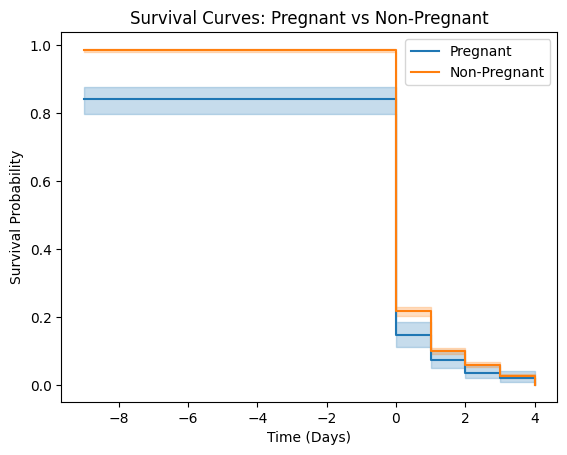

In [ ]:
import matplotlib.pyplot as plt

# Plot the survival curves for pregnant and non-pregnant individuals
fig, ax = plt.subplots()
kmf_pregnant.plot(ax=ax)
kmf_non_pregnant.plot(ax=ax)

# Add labels and legend
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.title('Survival Curves: Pregnant vs Non-Pregnant')
plt.legend(loc='best')

# Display the plot
plt.show()


**Step 5: Interpret the results:**

In [ ]:
print("Log-Rank Test Results:")
print(" - Test Statistic:", results.test_statistic)
print(" - P-Value:", results.p_value)

if results.p_value < 0.05:
    print(" - The survival curves for pregnant and non-pregnant individuals are significantly different.")
else:
    print(" - There is no significant difference in the survival curves for pregnant and non-pregnant individuals.")


Log-Rank Test Results:
 - Test Statistic: 42.96771781789348
 - P-Value: 5.5650614029254724e-11
 - The survival curves for pregnant and non-pregnant individuals are significantly different.


If the survival curve for non-pregnant individuals is on top of the curve for pregnant individuals, it suggests that non-pregnant individuals have lower survival times (i.e., shorter waiting times for treatment initiation) compared to pregnant individuals. In other words, non-pregnant individuals tend to receive treatment earlier than pregnant individuals.
The positioning of the curves on the plot indicates the relative survival probabilities over time. When one curve is consistently above the other, it implies that the group associated with the higher curve has better survival outcomes or experiences the event (treatment initiation) at a faster rate.
